In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import spacy
from nltk.tokenize import TweetTokenizer

In [2]:
from pprint import pprint
import warnings
import dataframe_image as dfi
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [3]:
sns.set()

In [4]:
posts_df = pd.read_csv('../data/tfilter_posts.csv')
nlp = spacy.load("en_core_web_lg")

In [7]:
posts_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
posts_df.head()

,level_0,index,post_id,author,location,date,post,lemma,comments,all_text,all_lemma,Filter_exp_1,Filter_exp_2
0,0,4,182941686,Beth Daoud,Congress Park,9 Apr,Squatters Camp. Am I the only one outraged by ...,outrage new squatter camp go 14th let allow ha...,"Everybody ""Wants to help"". But heaven forbid i...",Squatters Camp. Am I the only one outraged by ...,want help forbid show backyard want church exa...,10,1
1,2,7,183611885,Crystal Weaver,City Park,15 Apr,Fires around town. Someone just tried to set t...,fire town try set tree house vicinity fire gas...,Thanks for the warning..that’s disturbing\nI’m...,Fires around town. Someone just tried to set t...,thank warning disturbing glad neighbor injure ...,1,1
2,3,9,184321665,Bryn Creager,Congress Park,21 Apr,Brake in. On 4/19/21 at 2:05 AM a man broke in...,brake man break car park 6th steal garage door...,Looks like homeless goy on 14th and columbine\...,Brake in. On 4/19/21 at 2:05 AM a man broke in...,look homeless goy 14th sorry suck hope,6,1
3,4,10,184972043,Deb Christian,Hudson Street,27 Apr,It’s this whole thing of changing the housing ...,thing change housing code ask need,NaN,It’s this whole thing of changing the housing ...,NaN,9,0
4,5,11,185372613,Doug Bohm,Congress Park,1 May,Homeless tent ablaze burning car & property. L...,homeless tent ablaze burn car property night a...,Is this the same guy who panhandles on the sou...,Homeless tent ablaze burning car & property. L...,guy panhandle southwest intersection descripti...,9,1


In [9]:
# posts_df[posts_df['Filter_v_0'] == 0 ].shape

In [7]:
posts_df['Filter_1_labels'] = posts_df['Filter_exp_1'].map({0:'Help Homeless', 1:'Community Homeless', 2:'Misc',3:'Donate Homeless',4:'Masks',5:'Misc',6:'Misc',
                                                           7:'Vaccine', 8: 'Misc',9:'Sanctions Homeless',10:'Mutual Aid Homeless',11:'Misc', 12:'Clean Up',13:'Misc'})

posts_df['Filter_2_labels'] = posts_df['Filter_exp_2'].map({0:'Homeless', 1:'Misc',2:'Homeless'})


In [8]:
posts_df.dfi.export('../assets/Topics_df.png', max_rows = 10)

In [11]:
posts_df.dfi.export('../assets/Topics_df.fin.png', max_rows = 10)

In [12]:
posts_df['Filter_1_labels'].value_counts()

Misc                   815
Community Homeless      42
Clean Up                31
Sanctions Homeless      14
Vaccine                  9
Masks                    7
Mutual Aid Homeless      6
Help Homeless            6
Donate Homeless          3
Name: Filter_1_labels, dtype: int64

In [13]:
posts_df['Filter_2_labels'].value_counts()

Homeless    602
Misc        331
Name: Filter_2_labels, dtype: int64

In [17]:
posts_df['post'][8]

'Housing Assistance? Hi neighbors. There is an older gentleman in our neighborhood who is losing his home that he has been renting for 13 years because it has been purchased by developers. This is happening while he is going through chemotherapy. Since he is in no shape to actively find housing and has no family, I am trying to help. Who has a lead for an emergency situation like this? Thanks in advance for any help you can provide.'

# Select Filter
___

## Filter_exp_2a

In [19]:
drop = ['Filter_exp_1','Filter_exp_3','Filter_exp_4','Filter_exp_2',
       'Filter_1_labels','Filter_3_labels','Filter_4_labels','Filter_2_labels']
for col in drop:
    posts_df.drop(columns = [f'{col}'], inplace=True)

#posts_df['Filter'] = posts_df['Filter_exp_2']
#posts_df.drop(columns = ['Filter_exp_2'])

In [20]:
tweet = TweetTokenizer()
token_column = []
for post in posts_df.post:
    tokens  = tweet.tokenize(post)
    token_column.append(tokens)

# posts_df['Tokens'] = [ tokens for tokens in token_column ]
posts_df['Word Count'] = [ len(post) for post in token_column ]

<Figure size 1440x720 with 0 Axes>

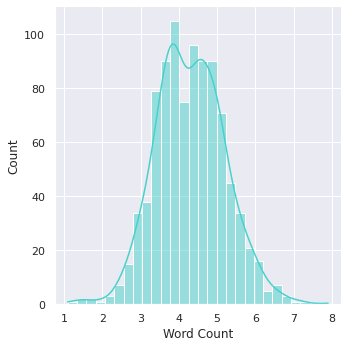

In [21]:
plt.figure(figsize = (20,10))
sns.displot(np.log(posts_df['Word Count']), color= 'mediumturquoise', kde= True);

In [22]:
posts_df

,post_id,author,location,date,post,Filter_exp_2a,Filter_2a_labels,Word Count
0,182941686,Beth Daoud,Congress Park,9 Apr,Squatters Camp. Am I the only one outraged by ...,2,Homeless,71
1,184828873,Darja Pisorn,Mayfair,26 Apr,Strange squirrel activity. Hey neighbors! Hopi...,1,Misc,275
2,183611885,Crystal Weaver,City Park,15 Apr,Fires around town. Someone just tried to set t...,1,Misc,76
3,184321665,Bryn Creager,Congress Park,21 Apr,Brake in. On 4/19/21 at 2:05 AM a man broke in...,1,Misc,99
4,184972043,Deb Christian,Hudson Street,27 Apr,It’s this whole thing of changing the housing ...,2,Homeless,28
...,...,...,...,...,...,...,...,...
928,171163993,Dyron Manning,Montbello,17 Dec,Lost bulldogs. My Bulldogs got out of back yar...,1,Misc,43
929,150824551,Lexy Beltran,Northeast Park Hill,6 Jun,Patio chairs. Any one selling patio chairs or ...,0,Homeless,15
930,141292402,News,NaN,NaN,Denver sets sights on hundreds of respite room...,2,Homeless,35
931,170010698,Leoma Burnette,Montbello,6 Dec,Lost dogs. Ringo & Trouble been missing since...,1,Misc,17


In [23]:
homeless_df = posts_df[posts_df['Filter_2a_labels']  == 'Homeless']
other_posts = posts_df[posts_df['Filter_2a_labels'] == 'Misc']

In [24]:
def t_sample(topic_df, n_samples):
    for i in range(1,n_samples+1):
        pprint(print(f'Post #{i}'))
        pprint(print(str(topic_df['post'][topic_df.sample().index[0]])))
        pprint(print('\n'))
    return ('complete')

In [25]:
t_sample(homeless_df, 2)

Post #1
None
job. CAN SOMEONE PLEASE HELP ME FIND A JOB!!!!!!!!!!
None


None
Post #2
None
UPDATE cold neighbors. Hello dear neighbors,
I have successfully completed a big and emotionally exhausting project. I was out all day last Friday and was able to distribute these items and lend a helping hand to a few cold folks. 
THIS WOULD NOT HAVE BEEN POSSIBLE WITHOUT THE DONATIONS FROM MY AMAZING NEIGHBORS!! With the money I purchased dozens of emergency blankets and received clothing donations like gloves, hats, blankets, as well as some hot tea containers which I filled up and gave out. 

 Jay blanket and gloves 

Mercedes blanket and tampons and a ride to a friends place

3 emergency blankets to 3 tentless friends sleeping on the sidewalk

A few dozen emergency blankets to tent camps

A donated coffee to a man who was sleeping on the corner 

Harrison - ride to the shelter, emergency blankets and a friend to talk to through the process of sobriety

Emergency sleeping bag for a man who di

'complete'

___
___
___

# Unbalance topics 

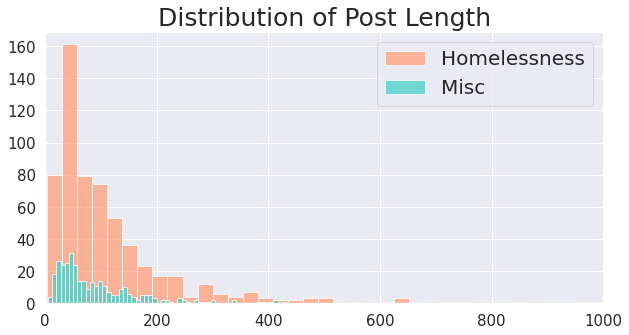

In [26]:
plt.figure(figsize=(10,5))
plt.colormaps()
plt.hist(homeless_df['Word Count'], bins = 100 , alpha = 0.75, label = 'Homelessness', color = 'lightsalmon');

plt.hist(other_posts['Word Count'], bins = 100 , alpha = 0.75, label = 'Misc', color = 'mediumturquoise')

plt.title('Distribution of Post Length', fontsize = 25)
plt.legend(fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(0,1000)

plt.savefig('../assets/distribution.png')

# Log Distribution 

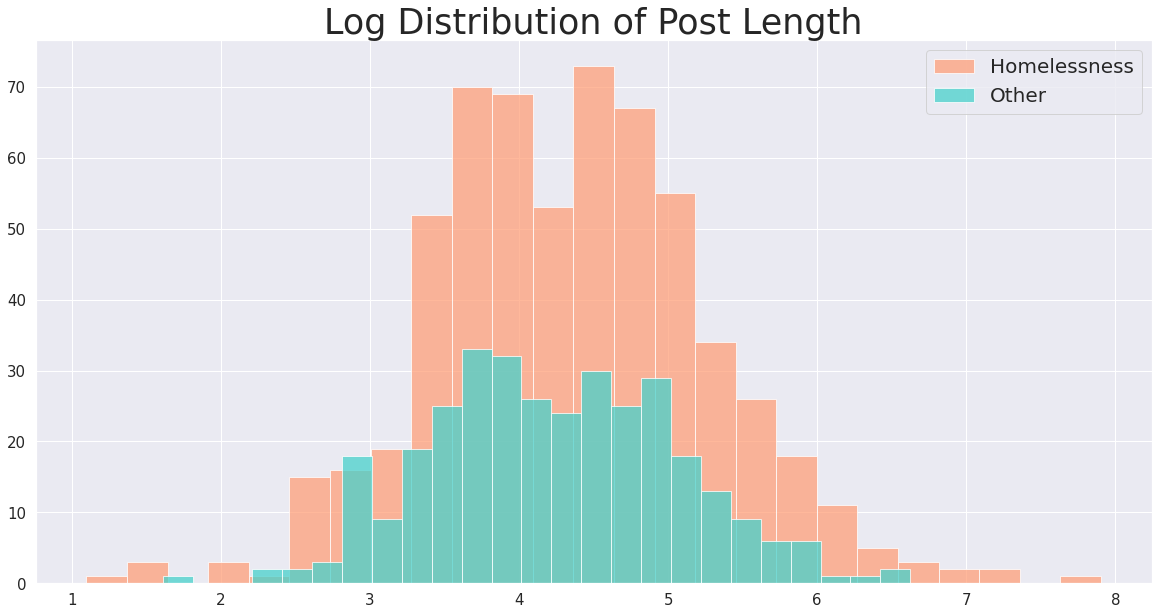

In [27]:
plt.figure(figsize=(20,10))
plt.hist(np.log(homeless_df['Word Count']), bins = 25 , alpha = 0.75, label = 'Homelessness', color = 'lightsalmon');
plt.hist(np.log(other_posts['Word Count']), bins = 25 , alpha = 0.75, label = 'Other', color = 'mediumturquoise');
plt.title('Log Distribution of Post Length', fontsize = 35)
plt.legend(fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.colormaps();
plt.savefig('../assets/log_distribution.png')

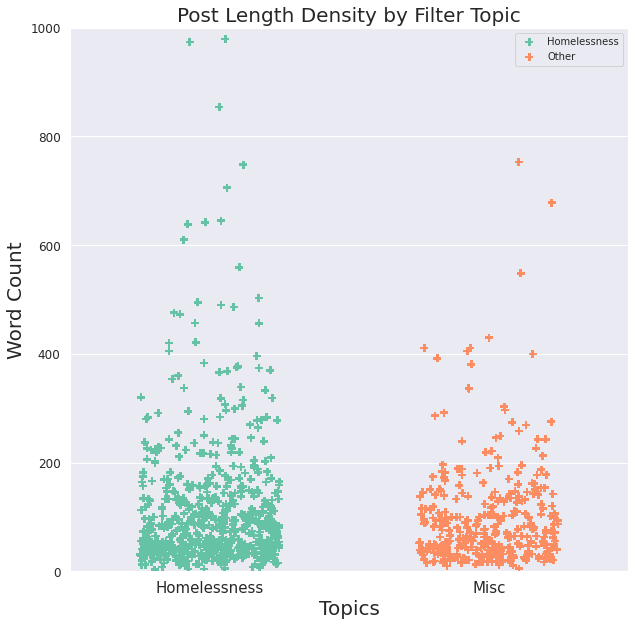

In [28]:
plt.figure(figsize = (10,10))
#sns.set_style('whitegrid')
sns.stripplot(x="Filter_2a_labels", y="Word Count", data=posts_df,
             jitter = 0.25,
             palette = 'Set2',
             size = 8,
             marker = 'P');
plt.ylim(0,1_000);
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 15)
plt.ylabel('Word Count', fontsize = 20)
plt.xlabel('Topics',fontsize = 20)

plt.title('Post Length Density by Filter Topic', fontsize = 20);
plt.legend(['Homelessness','Other'], fontsize = 10);
plt.xticks([0,1],['Homelessness', 'Misc'])
plt.savefig('../assets/post_lenght_density.png')

In [29]:
from myfunct import *

In [30]:
# !python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")
token_text, corpus, id2word = load_data('topic_1.01')

In [31]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage

lang = SpacyLanguage('en_core_web_lg')
# words = [word for word in post for post in t1_tokens ]
# words = [ w for w in post for post in token_text]
words = [id2word[i].lower() for i in range(0,len(id2word))]
emb = lang[words]
emb.plot_interactive(x_axis='homeless', y_axis='crime')

alt.LayerChart(...)

In [37]:
lda_model = gensim.models.ldamodel.LdaModel.load('../data/models/filter_2a.fin.model')

In [38]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

<ipython-input-39-dbe374280c30>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'],rotation=30, horizontalalignment= 'right' );
<ipython-input-39-dbe374280c30>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'],rotation=30, horizontalalignment= 'right' );
<ipython-input-39-dbe374280c30>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'],rotation=30, horizontalalignment= 'right' );


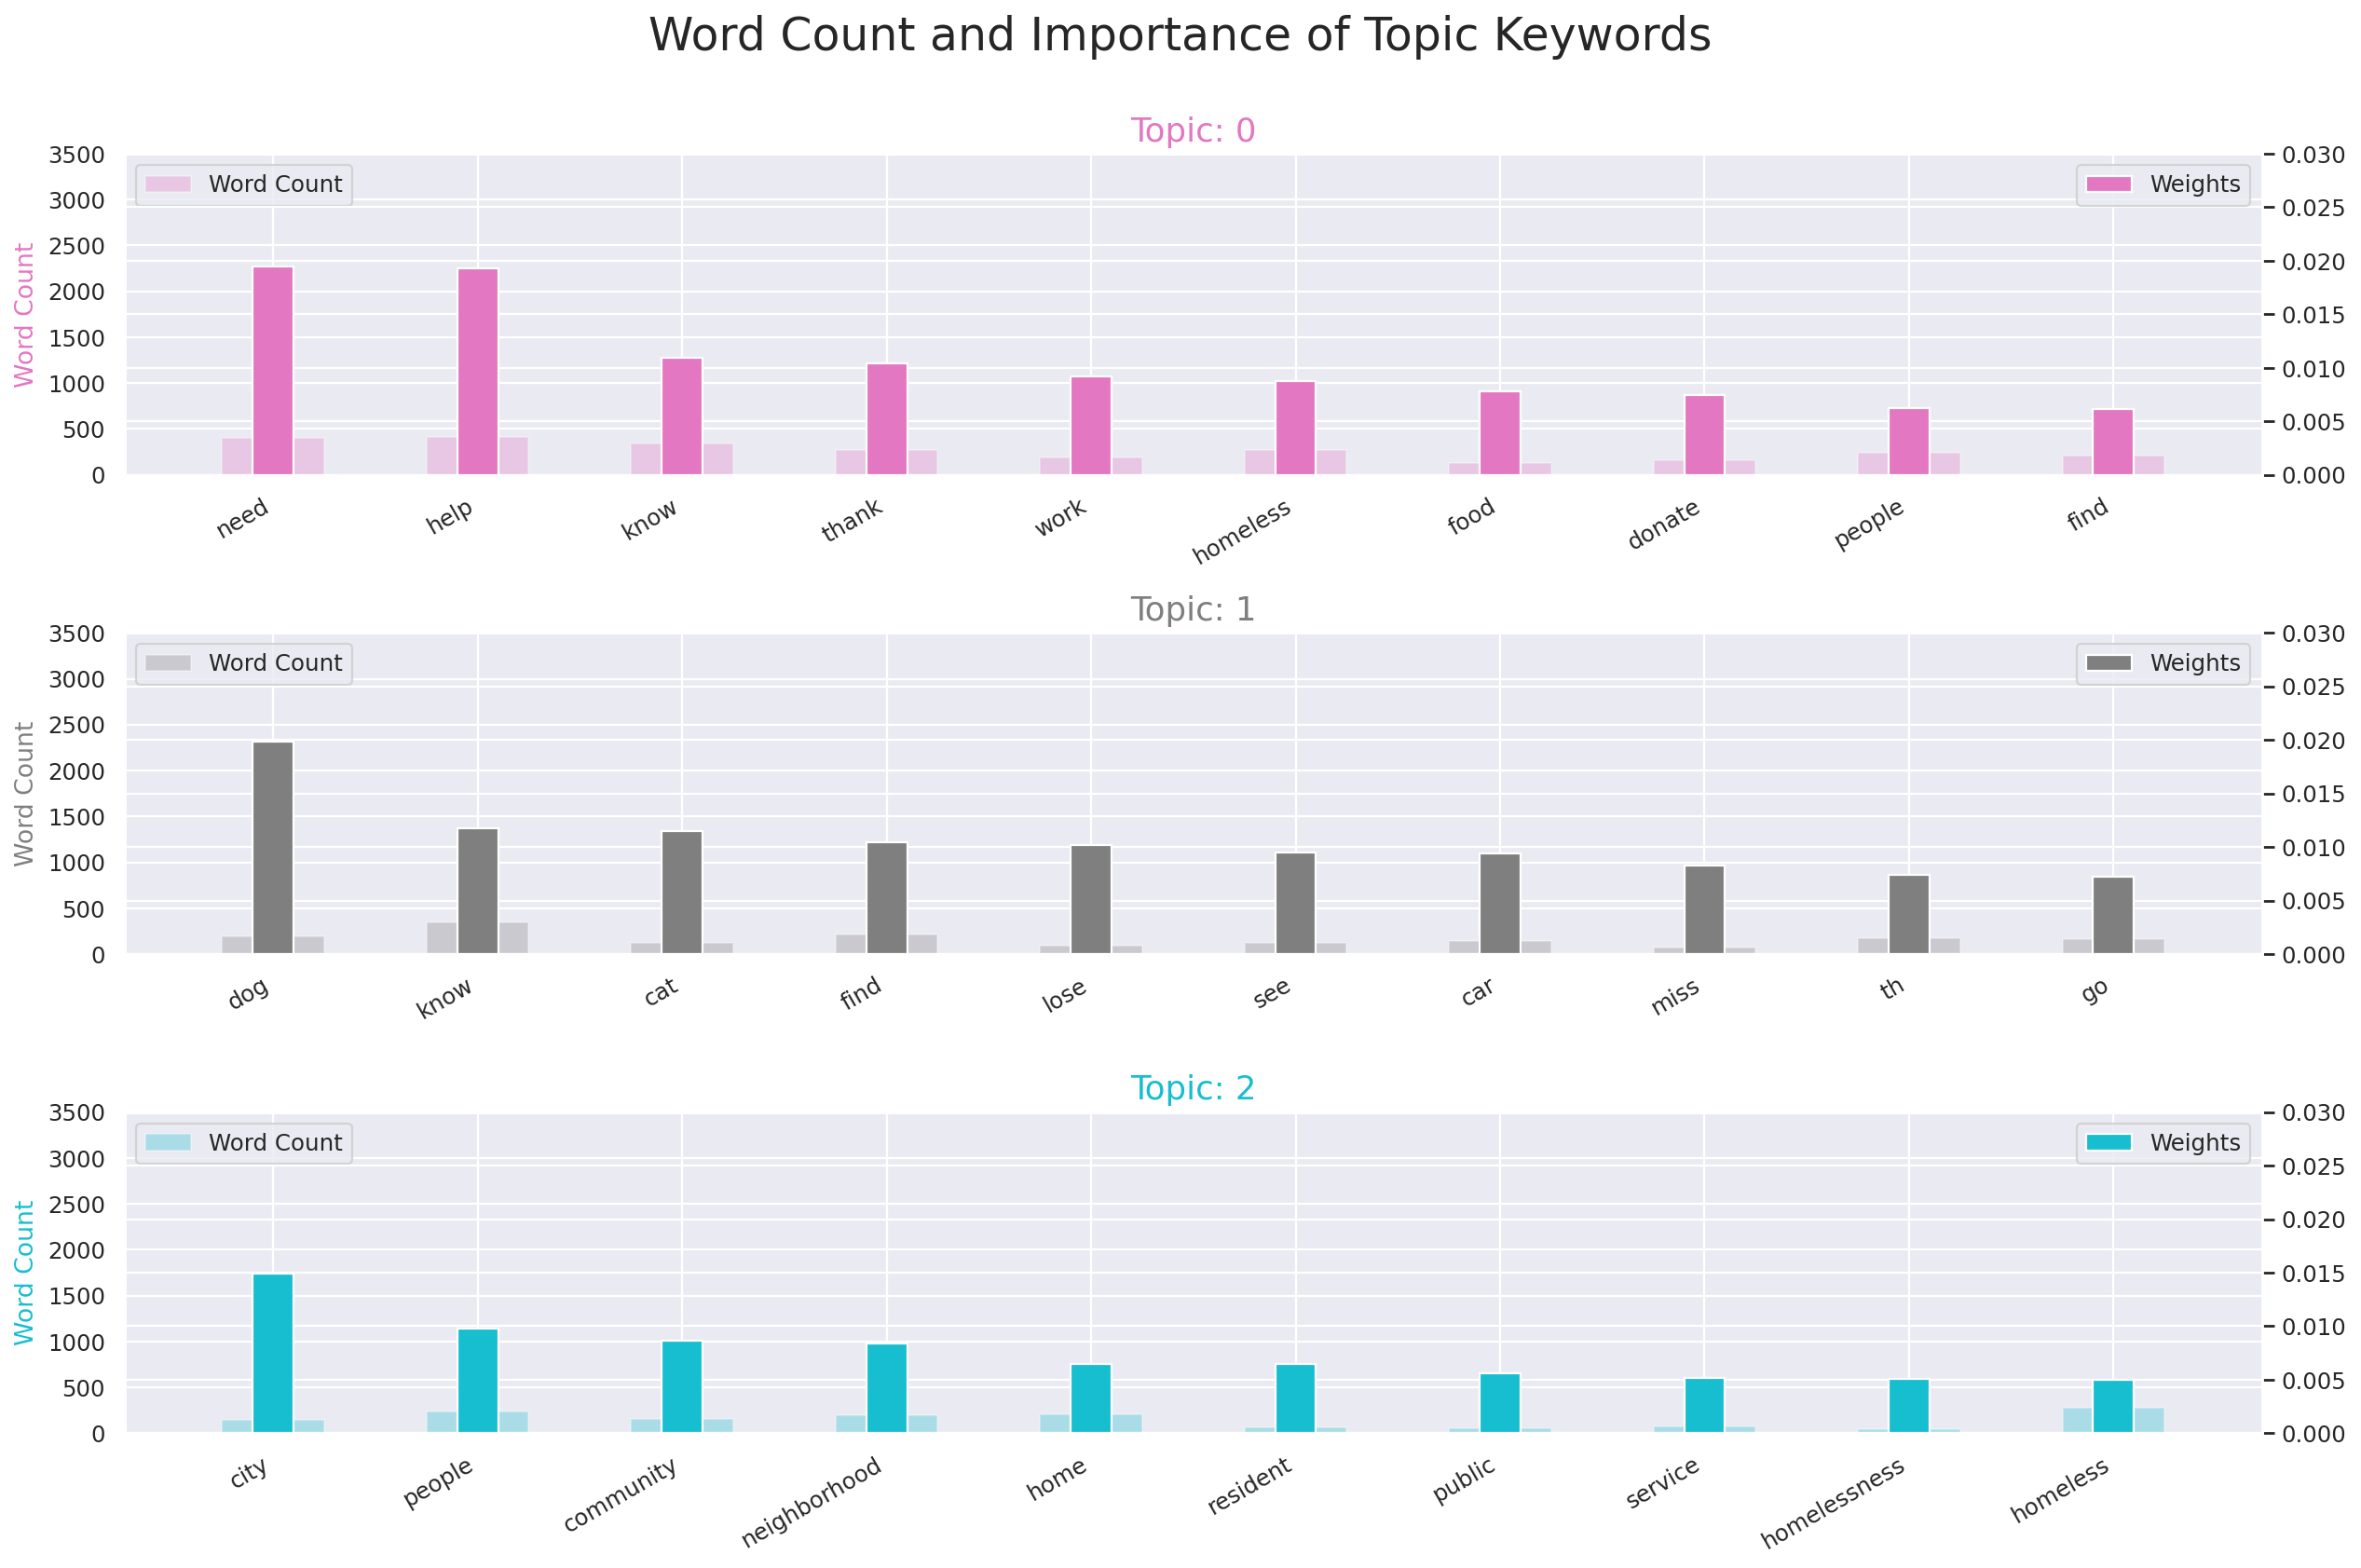

In [39]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in token_text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(16,10), sharey=True, dpi=160)
cols = [#'#d62728',
 #'#9467bd',
 #'#8c564b',
 '#e377c2',
 '#7f7f7f',
 #'#bcbd22',
 '#17becf']
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'],rotation=30, horizontalalignment= 'right' );
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig('../assets/words_in_topics.png')
plt.show();

In [40]:
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
mycolors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

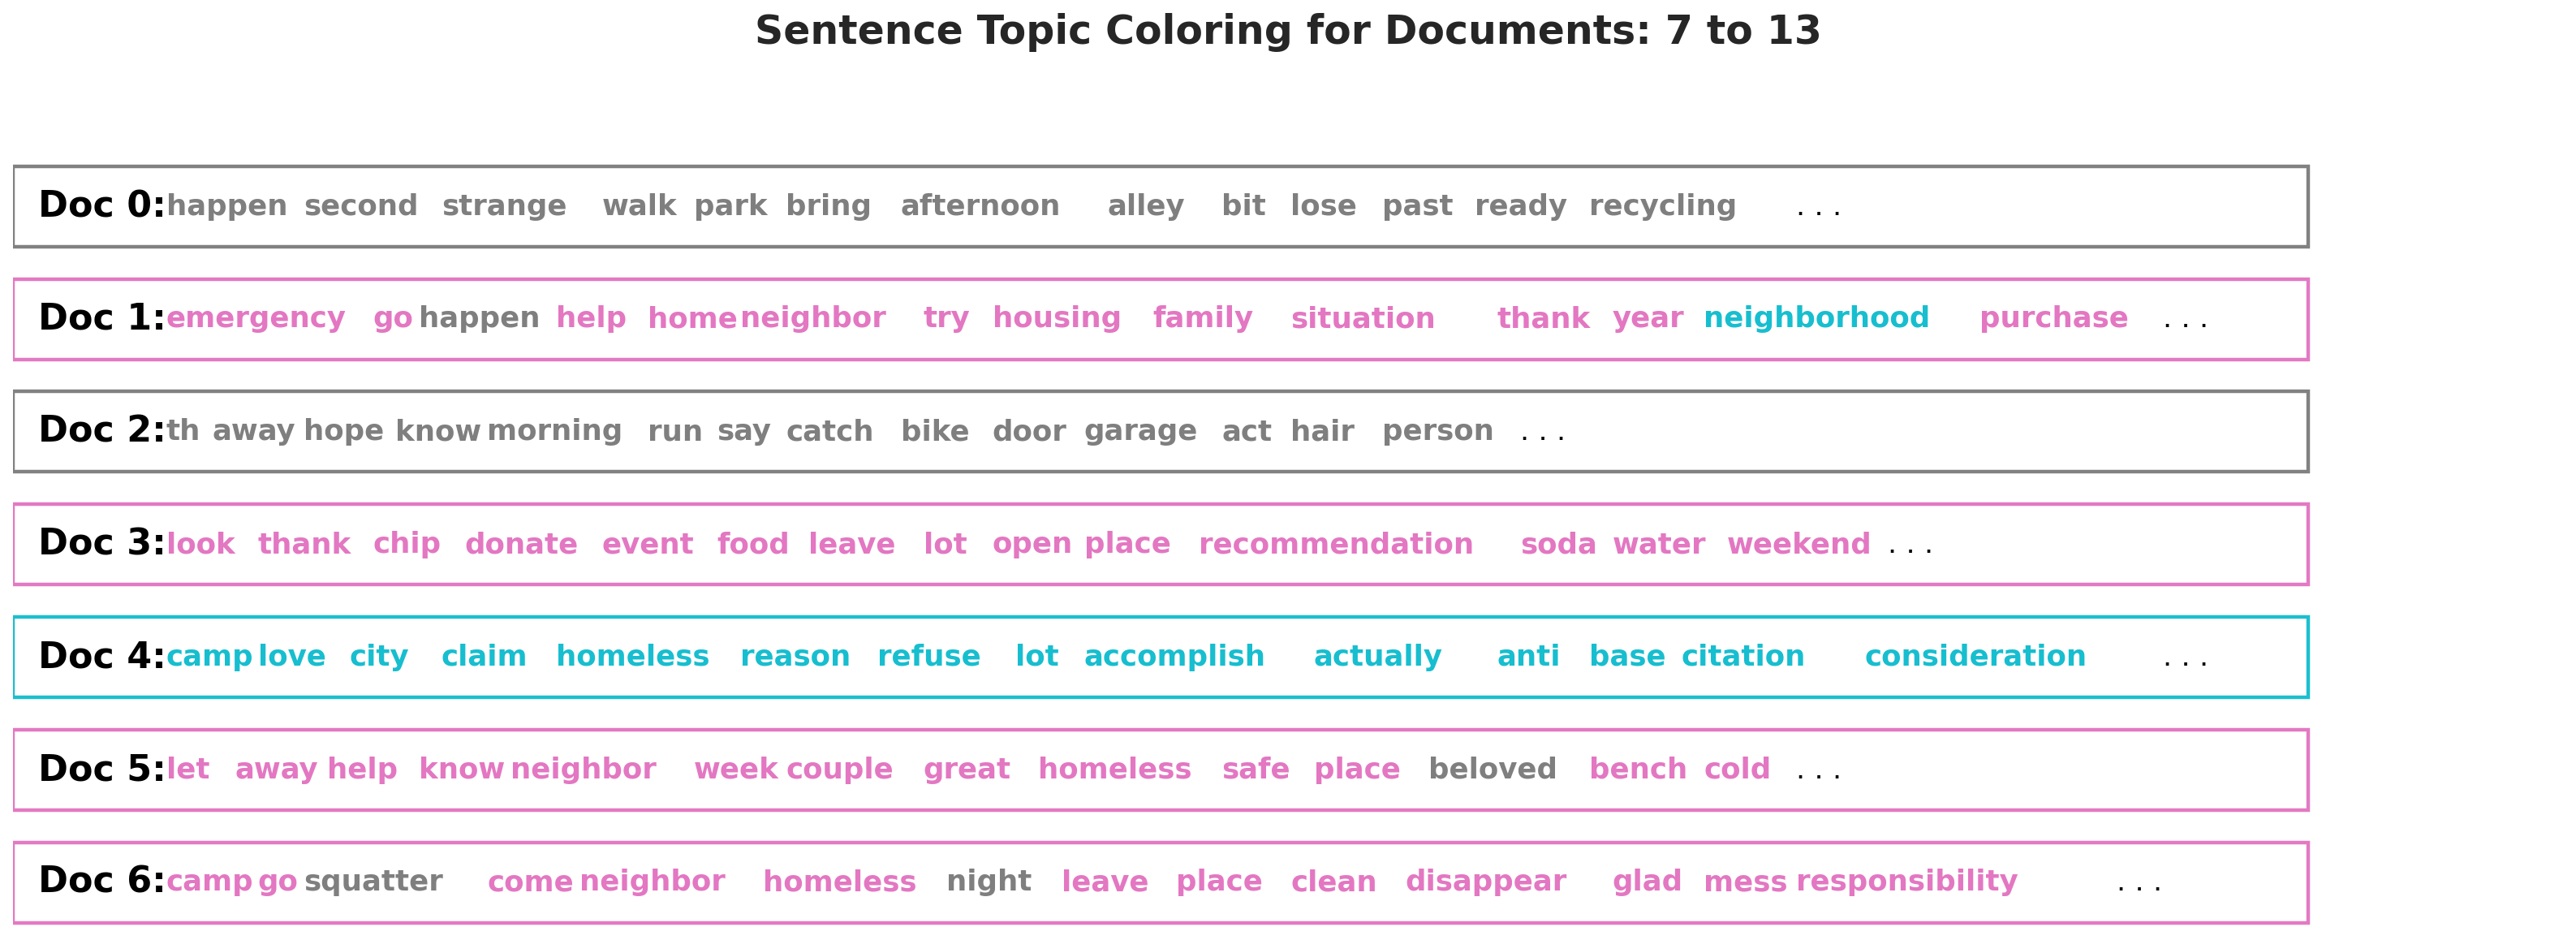

In [41]:
def sentences_chart(lda_model=lda_model, corpus=corpus, start = 7, end = 15):
    corp = corpus[start:end]
    mycolors = [ '#e377c2',
                 '#7f7f7f',
                 #'#bcbd22',
                 '#17becf']

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=20, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.9, 0.90, fill=None, alpha=5, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.savefig('../assets/Word_bars.png')
    plt.show()

sentences_chart()    

In [42]:
homeless_df.to_csv('../data/homeless_posts.csv')